# Pyteomics ms data reader

The tool is adapted from [Link to the Github](https://github.com/pymzml/pymzML)

The whole workflow should cite 

```
M Kösters, J Leufken, S Schulze, K Sugimoto, J Klein, R P Zahedi, M Hippler, S A Leidel, C Fufezan; pymzML v2.0: introducing a highly compressed and seekable gzip format, Bioinformatics, doi: https://doi.org/10.1093/bioinformatics/bty046
```

The Introduction is [Here](https://pyteomics.readthedocs.io/en/latest/data.html#mzml-and-mzxml)

In [128]:
#Possible to read the raw data--not recommend though
for line in open('2min.mzML','r'):
    print(line)

<?xml version="1.0" encoding="ISO-8859-1"?>

<indexedmzML xmlns="http://psi.hupo.org/schema_revision/mzML_0.99.1"

  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"

  xsi:schemaLocation="http://psi.hupo.org/schema_revision/mzML_0.99.1 mzML0.99.1_idx.xsd" >

  <mzML xmlns="http://psi.hupo.org/schema_revision/mzML_0.99.1"

    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"

    xsi:schemaLocation="http://psi.hupo.org/schema_revision/mzML_0.99.1 mzML0.99.1.xsd"

    accession=""

    id="2min.raw"

    version="0.99.1" >

    <cvList count="1" >

      <cv cvLabel="MS"

        fullName="Proteomics Standards Initiative Mass Spectrometry Ontology"

        version="2.0.2"

        URI="http://psidev.sourceforge.net/ms/xml/mzdata/psi-ms.2.0.2.obo" />

    </cvList>

    <fileDescription>

      <fileContent>

        <cvParam cvLabel="MS"

          accession="MS:1000580"

          name="MSn spectrum"

          value="" />

      </fileContent>

      <sourceFileList count="

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [137]:
import pyteomics
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt

In [77]:
#Read mzml files
f=mzml.MzML('2min.mzML')

In [132]:
#The data structure is a mzml list contains scans as dictionary and titles
#Could iterate for the MS1/MS2 spectrums
f[i] #where i is the index

#Get the scan time--Data structure is complex
f[0]['spectrumDescription']['scan'][0]['scan time']

1.109

In [133]:
f[0]['spectrumDescription']['total ion current']

9178.0

In [113]:
#Have some issue with the scan time?
for spec in f.map():
    if spec['msLevel'] == '1':
        print (spec['id'],spec['spectrumDescription']['scan'][0]['scan time'])

S1 1.109
S3 7.55
S5 13.991
S7 20.432
S9 26.878
S11 33.319
S13 39.76
S15 46.201
S17 52.642
S21 65.524
S23 71.965
S27 84.847
S19 59.083
S29 91.288
S31 97.729
S37 117.052
S35 110.611
S33 104.17
S25 78.406


In [124]:
#By this way iteration works
for i in range(len(f)):
    if f[i]['msLevel'] == '1':
        print (f[i]['id'],f[i]['spectrumDescription']['scan'][0]['scan time'])

S1 1.109
S3 7.55
S5 13.991
S7 20.432
S9 26.878
S11 33.319
S13 39.76
S15 46.201
S17 52.642
S19 59.083
S21 65.524
S23 71.965
S25 78.406
S27 84.847
S29 91.288
S31 97.729
S33 104.17
S35 110.611
S37 117.052


In [156]:
#TIC plot
def tic_plot(spectrum):
    time=[]
    TIC=[]
    for i in range(len(spectrum)):
        time.append((spectrum[i]['spectrumDescription']['scan'][0]['scan time'])/60)
        TIC.append(spectrum[i]['spectrumDescription']['total ion current'])
        
    plt.figure(figsize=(10,6))
    plt.plot(time,TIC)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('RT (min)')
    plt.ylabel('TIC')
    plt.title('TIC spectrum')
    plt.show()
    
    return

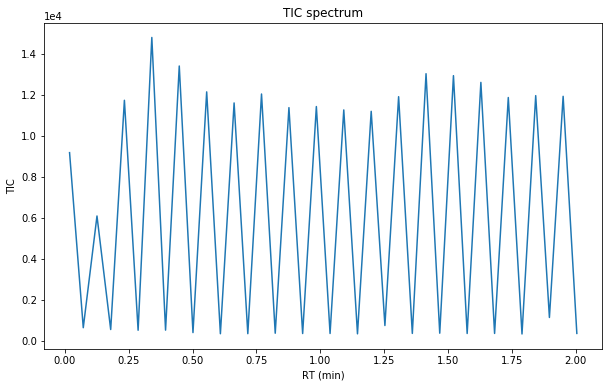

In [157]:
tic_plot(f)

In [181]:
peaklist=list(zip(f[0]['m/z array'],f[0]['intensity array']))

In [182]:
peaklist

[(-4.834766e-07, 0.0),
 (656194800000.0, 0.0),
 (9.225741e-06, 4.6006e-41),
 (8.105453e-24, 4.6006e-41),
 (-8.192523e+35, 0.0),
 (-1.1513525e+19, 0.0),
 (-10.111391, 4.6006e-41),
 (-8.878654e-18, 4.6006e-41),
 (-1.2472071e-34, 2.3049e-41),
 (1.2677269e+25, 4.6006e-41),
 (11126850.0, 4.6006e-41),
 (1.5623505e-10, 4.6006e-41),
 (1.3709003e-28, 0.0),
 (-194374150000000.0, 0.0),
 (-0.00017050005, 4.6006e-41),
 (-2.3926333e-21, 0.0),
 (-1.0589583e-29, 0.0),
 (1.717526e+31, 4.6006e-41),
 (15034602000000.0, 0.0),
 (6.2251033e+35, 0.0),
 (8.711124e+18, 4.6006e-41),
 (121.89113, 0.0),
 (935384450000.0, 0.0),
 (1.3100276e-05, 4.6006e-41),
 (1.8345721e-22, 0.0),
 (4.1103027e-38, 0.0),
 (-6.6345165e+22, 4.6006e-41),
 (-928916.1, 0.0),
 (4130402000000000.0, 0.0),
 (0.057809122, 4.6006e-41),
 (8.09039e-19, 0.0),
 (-1.5001662e-32, 0.0),
 (2.4416226e+28, 4.6006e-41),
 (343138170000.0, 0.0),
 (-2.8439531e+28, 0.0),
 (-398972750000.0, 4.6006e-41),
 (-5.596464e-06, 0.0),
 (-1.2558995e-21, 4.6006e-41),
 (